# Análise Exploratória
Neste notebook faremos uma análise exploratória sobre o conjunto de dados disponibilizado pela Keycash sobre imóveis e seus respectivos preços.
A análise preditiva sobre a precificação de imóveis será realizada no RStudio com R.

In [1]:
# Importando as bibliotecas necessárias e os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
dados = pd.read_csv('Desafio2_input.csv', sep = ";").set_index("Id")

In [2]:
# Visualizando a estrutura do dataset com 5 amostras aleatórias
dados.sample(5)

,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
Id,,,,,,,,,,,,
466,RM,4435,6,2004,Ex,1,1,2,3,1,2,155900
59,RL,7590,6,1966,TA,1,3,4,6,1,2,155000
54,RL,8461,6,2005,Ex,2,3,4,8,1,2,163990
168,RL,8123,6,2000,Ex,2,3,4,7,1,2,179000
492,RL,9764,5,1967,Ex,1,3,4,5,0,2,130000


In [3]:
# Avaliando se existem dados missing/faltantes
# não existem
dados.isnull().sum()

Zona                    0
Area                    0
Qualidade               0
AnoConstrucao           0
QualidadeAquecimento    0
Banheiros               0
Quartos_t1              0
Quartos_t2              0
Comodos                 0
Lareiras                0
Garagem                 0
Preco                   0
dtype: int64

In [4]:
# Verificando dados numéricos e categóricos (data type)
dados.dtypes

Zona                    object
Area                     int64
Qualidade                int64
AnoConstrucao            int64
QualidadeAquecimento    object
Banheiros                int64
Quartos_t1               int64
Quartos_t2               int64
Comodos                  int64
Lareiras                 int64
Garagem                  int64
Preco                    int64
dtype: object

In [5]:
# Visualizando a frequência absoluta da variável qualidade
dados.Qualidade.value_counts()

5    241
6    228
7    100
4     51
8      9
Name: Qualidade, dtype: int64

In [6]:
# Considerando a variável Qualidade como categórica
# em que a label 4 é a pior qualidade e a label 8 é a melhor qualidade
# transformando a variável Qualidade em categórica
dados['Qualidade'] = dados['Qualidade'].astype("object")

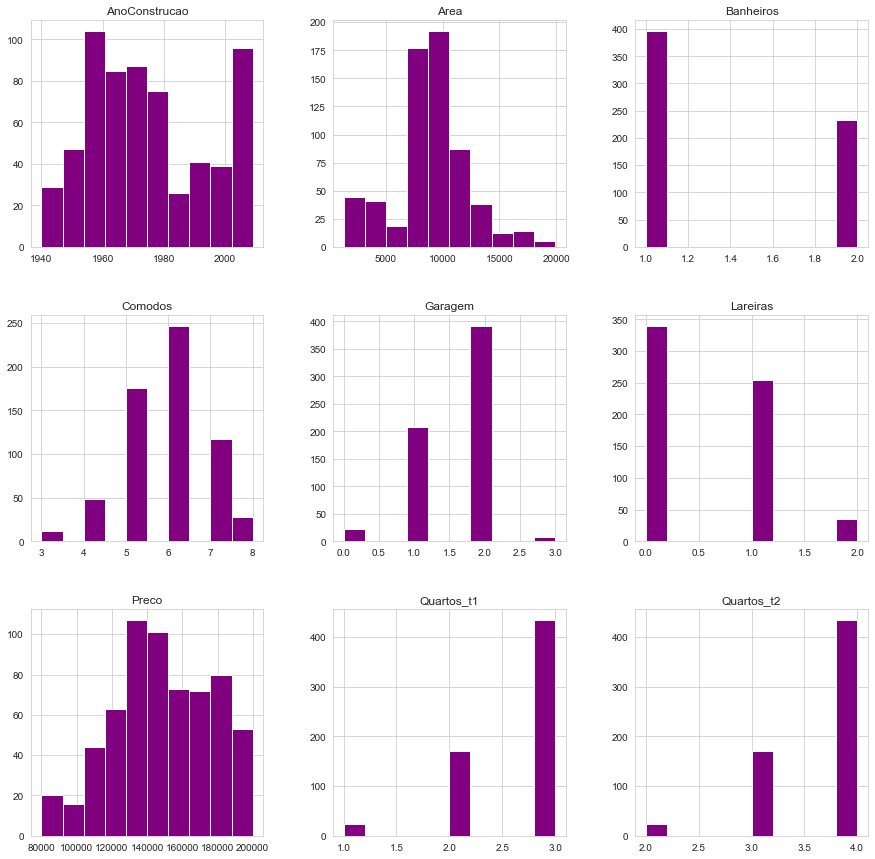

In [7]:
# Visualizando a distribuição das variáveis numéricas 
dados.hist(color = 'purple', figsize=(15,15))
plt.show()

In [8]:
# Utilizando o método describe() para visualizar as estatísticas descritivas das variáveis numéricas
round(dados.describe())

,Area,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
count,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0,629.0
mean,8932.0,1974.0,1.0,3.0,4.0,6.0,1.0,2.0,148235.0
std,3319.0,19.0,0.0,1.0,1.0,1.0,1.0,1.0,28088.0
min,1300.0,1940.0,1.0,1.0,2.0,3.0,0.0,0.0,80000.0
25%,7420.0,1959.0,1.0,2.0,3.0,5.0,0.0,1.0,129000.0
50%,9000.0,1971.0,1.0,3.0,4.0,6.0,0.0,2.0,147000.0
75%,10530.0,1993.0,2.0,3.0,4.0,6.0,1.0,2.0,173000.0
max,19900.0,2009.0,2.0,3.0,4.0,8.0,2.0,3.0,200000.0


In [9]:
# Em média os imóveis possuem uma área de 8932 m²
# A maioria possui um banheiro
# 3 quartos do tipo 1 e 4 quartos do tipo 2
# uma média de 6 comodos, 1 lareira, 2 garagens
# Preço médio de R$ 148.235,00, valor muito próximo da mediana de 147.000,00

In [10]:
# Criando a variável década de construção
decadas = dados[['AnoConstrucao', 'Preco']]
for i in decadas.AnoConstrucao.unique():
    if i >= 1940 and i < 1950:
        decadas['AnoConstrucao'].replace(i, 40, regex=True, inplace=True)
    elif i >= 1950 and i < 1960:
        decadas['AnoConstrucao'].replace(i, 50, regex=True, inplace=True)
    elif i >= 1960 and i < 1970:
        decadas['AnoConstrucao'].replace(i, 60, regex=True, inplace=True)
    elif i >= 1970 and i < 1980:
        decadas['AnoConstrucao'].replace(i, 70, regex=True, inplace=True)
    elif i >= 1980 and i < 1990:
        decadas['AnoConstrucao'].replace(i, 80, regex=True, inplace=True)
    elif i >= 1990 and i < 2000:
        decadas['AnoConstrucao'].replace(i, 90, regex=True, inplace=True)
    elif i >= 2000 and i < 2010:
        decadas['AnoConstrucao'].replace(i, 2000, regex=True, inplace=True)
decadas.rename(mapper={'AnoConstrucao':'DecadaConstrucao'}, axis=1, inplace=True)        
decadas['AnoConstrucao'] = dados['AnoConstrucao']
decadas = decadas.astype(int)
decadas.sort_values('DecadaConstrucao', ascending=False, inplace=True)

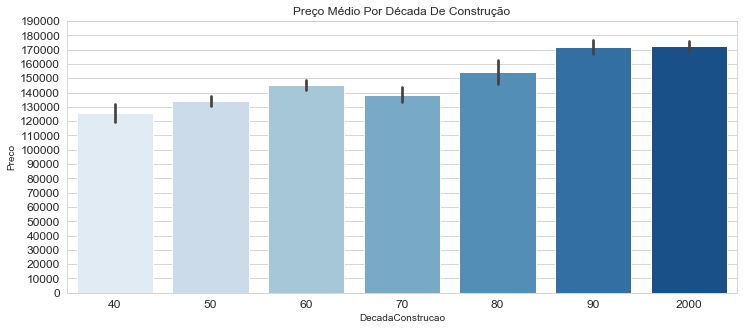

In [11]:
# Visualizando o preço médio por década de construção 
plt.figure(figsize=[12,5])
sns.barplot(x = "DecadaConstrucao", y = "Preco",  data = decadas, palette=sns.color_palette('Blues',7))
plt.title('Preço Médio Por Década De Construção', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(np.arange(0,200000, 10000), fontsize=12)
plt.show()

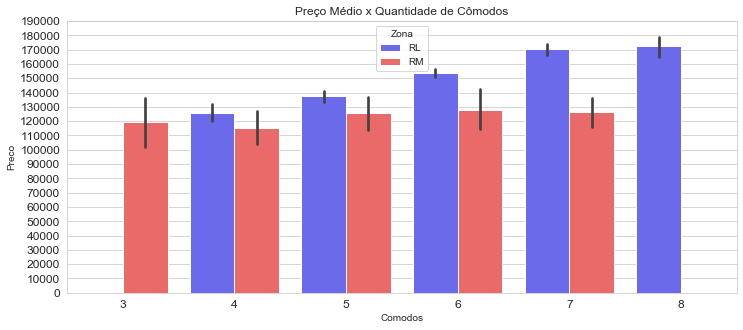

In [12]:
# Visualizando o preço médio por quantidade de comodos e zona
plt.figure(figsize=[12,5])
sns.barplot(x = "Comodos", y = "Preco", hue = "Zona", data = dados,
            palette=sns.color_palette('seismic', 2))
plt.title('Preço Médio x Quantidade de Cômodos', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(np.arange(0,200000, 10000), fontsize=12)
plt.show()

In [13]:
# Zona RL não possui imóveis com 3 cômodos
# Zona RM não possui imóveis com 8 cômodos

# Zona RM tem preço médio entre 110.000,00 e 130.000,00, independente do número de cômodos,
# Zona RL possui aumento significativo no preço conforme aumenta a quantidade de cômodos
# ou seja o preço médio varia menos na Zona RM quando varia-se a quantidade de cômodos

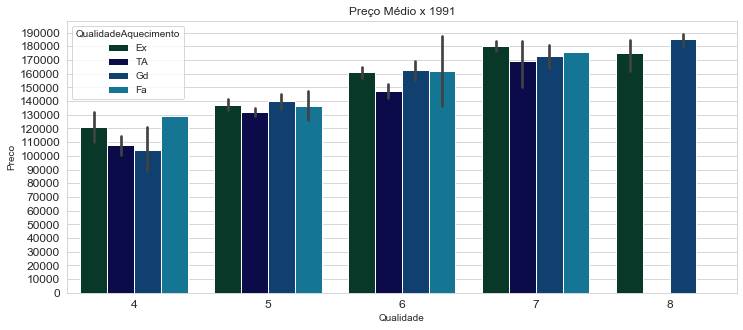

In [14]:
# Avaliando o preço médio em função da qualidade dos materiais e do aquecimento
plt.figure(figsize=[12,5])
sns.barplot(x = "Qualidade", y = "Preco", data = dados, hue = "QualidadeAquecimento",
            palette=sns.color_palette('ocean',5))
plt.title('Preço Médio x '+str(i), fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(np.arange(0,200000, 10000), fontsize=12)
plt.show()

In [15]:
# com esses gráficos é possível determinar, por exemplo, que um imóvel de qualidade dos materiais = 7
# e qualidade do aquecimento = Ex tem um preço médio de 180000
# enquanto um imóvel na  mesma qualidade de aquecimento, porém na categoria 4 de materiais 
# tem preço médio de 120000 

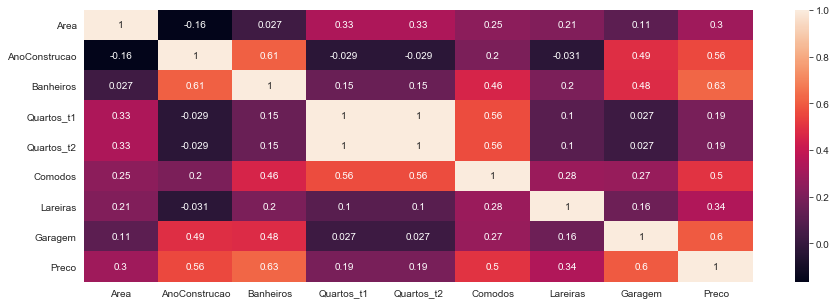

In [16]:
# Avaliando se existe correlação entre as variáveis quantitativas
plt.figure(figsize=[15, 5])
sns.heatmap(dados.corr(), annot = True)
plt.show()

In [17]:
# Area tem correlação positiva com todas as outras, exceto AnoConstrucao
# isso indica que a area do imovel tende a diminuir se o imóvel foi construído recentemente
# Correlação não indica causalidade
# Em relação a variável alvo (Preco), possui correlacao positiva com todas as outras, 
# porém de forma mais forte com a quantidade de banheiros e de garagens do imóvel
# ou seja, o preço tende a aumentar quando aumentamos o número de banheiros e garagens do imóvel

Analise de Outliers

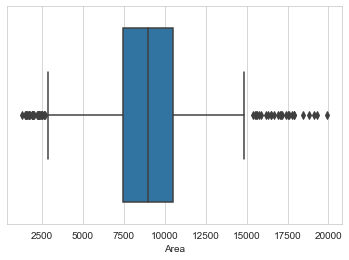

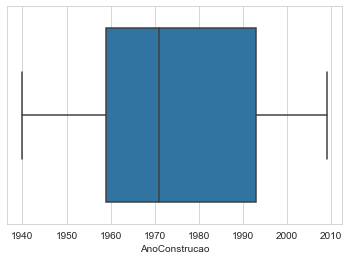

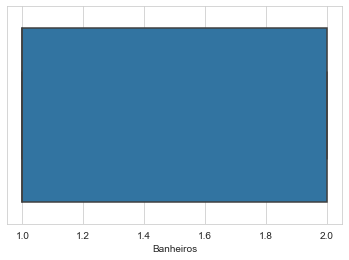

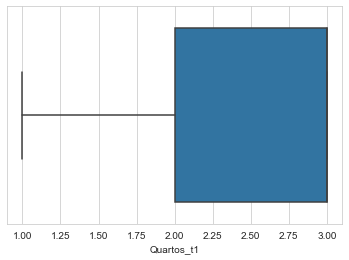

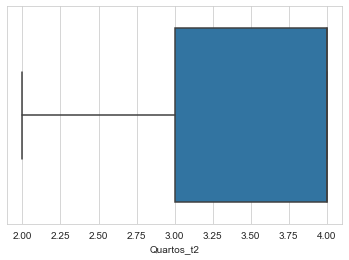

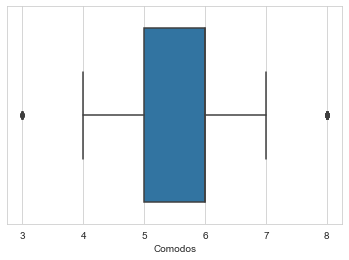

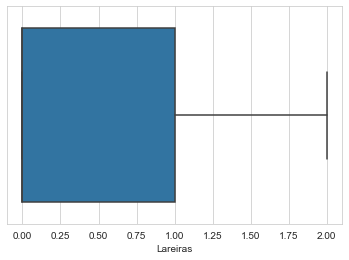

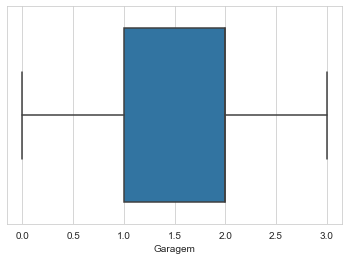

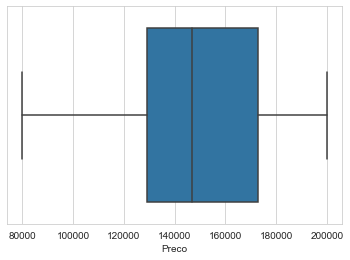

In [18]:
# Vamos verificar se existem outliers nas variaveis numericas preditoras
for i in dados.describe().columns:
    sns.boxplot(dados[i])
    plt.show()

In [19]:
# Neste cenário identificamos que a variável Area possui muitos outliers
# Para solucionar esse problema sem perder os dados
# vamos realizar um agrupamento por kmeans considerando a Area e o Preco 
# e construir um modelo para cluster

0


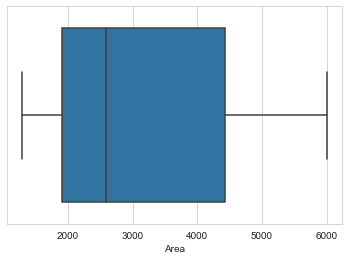

1


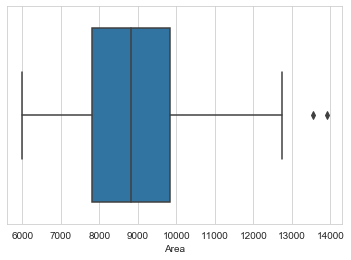

2


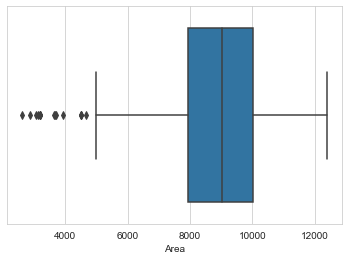

3


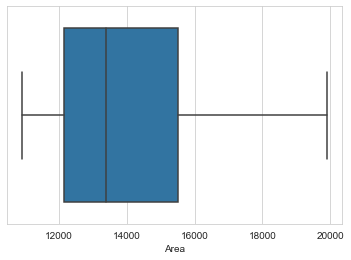

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pad = StandardScaler()
base = pad.fit_transform(dados[['Area', 'Preco']])
kmeans = KMeans(4)
dados['Grupo'] = kmeans.fit_predict(base)

# Verificando se diminuimos a quantidade de outliers em cada grupo na variavel area
for i in range(0, 4):
    sns.boxplot(dados[dados['Grupo']==i]['Area'])
    print(i)
    plt.show()

In [21]:
# Percebemos que mesmo assim 2 grupos apresentam outliers
# Vamos removê-los do conjunto e salvar 4 novos arquivos csv que serão treinados no R Studio
# Caso esteja rodando novamente este notebook perceba que os grupos podem variar
# imprimir acima dos graficos a label de cada grupo
# precisamos ajustar abaixo antes de salvar os arquivos em csv:
dados[dados['Grupo']==1].where(dados['Area'] < 13000).dropna().drop('Grupo', axis = 1).to_csv('grupo1.csv', index = False)
dados[dados['Grupo']==2].where(dados['Area'] > 7000).dropna().drop('Grupo', axis = 1).to_csv('grupo2.csv', index = False)
dados[dados['Grupo']==0].drop('Grupo', axis = 1).dropna().to_csv('grupo3.csv', index = False)
dados[dados['Grupo']==3].drop('Grupo', axis = 1).dropna().to_csv('grupo4.csv', index = False)